# Abstract

In this work, we are going to show the basic concepts of image processing in observational techniques in astrophysics.
We will use Python to treat the images of a galaxy obtained by the Jacobus Kapteyn Telescope by the observatory of La Palma.
In addition, a lot of concepts in physics and statistics could be apply to explain some steps in the image processing such as the importance of using a certain filter, the use of some statisitical parameters, etc.

# Introduction

First of all, we need to load the basic packages in Jupyter Notebook such as numpy and matplotlib.
Other special packages should be load because there are special function that we can´t use without them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
from photutils.segmentation import make_source_mask
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from photutils.detection import find_peaks
from photutils.centroids import centroid_com, centroid_quadratic
from photutils.aperture import aperture_photometry
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from photutils.centroids import centroid_sources
from PIL import Image
from scipy import ndimage, misc

We have to download the files.fits in our computer and search them.

In [3]:
cd descargas\ de\ TO/ngc6118/ngc6118

/Users/macintoshhd/Desktop/archivosTO/descargas de TO/ngc6118/ngc6118


In [10]:
ls

20030723.jkt    r326222.fits    r326247.fits    r326289.fits    r326299.fits
badpix.lis      r326223.fits    r326248.fits    r326290.fits    r326300.fits
r326214.fits    r326229.fits    r326249.fits    r326291.fits    r326301.fits
r326215.fits    r326230.fits    r326250.fits    r326292.fits    r326310.fits
r326216.fits    r326231.fits    r326251.fits    r326293.fits    r326311.fits
r326217.fits    r326232.fits    r326252.fits    r326294.fits    r326312.fits
r326218.fits    r326233.fits    r326285.fits    r326295.fits    r326313.fits
r326219.fits    r326234.fits    r326286.fits    r326296.fits    superbias.fits
r326220.fits    r326245.fits    r326287.fits    r326297.fits
r326221.fits    r326246.fits    r326288.fits    r326298.fits


Now, we can examine the files and open one of them, for example, the file "r326214.fits".

In [11]:
hdul = fits.open("r326214.fits")

If we want information of this file, we write:

In [12]:
hdul.info()

Filename: r326214.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (2088, 2120)   int16 (rescales to uint16)   


We can see basic information of this file, such as its name, the type, the format although the most important are the dimensions.

Length of this file

In [13]:
len(hdul)

1

In the header we can see all the information about this file. 
There are a lot of information such as the object type, the exposure time, date when FITS  was generated, etc.

In [14]:
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2088 / Axis length                                    
NAXIS2  =                 2120 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2010-10-18T06:42:39' / Date FITS file was generated                  
IRAF-TLM= '2010-10-18T06:42:39' / Time of last modification                     
OBJECT  = 'Bias    '           / Name of the object observed                    
RUN     =               3262

In other hand, the HDU’s data is an image so the data attribute of the HDU object will return a numpy ndarray object.

In [15]:
hdul[0].data

array([[2290, 2295, 2369, ...,  538,  539,  535],
       [ 535,  535,  536, ...,  538,  538,  538],
       [ 535,  536,  540, ...,  537,  540,  538],
       ...,
       [ 539,  538,  539, ...,  539,  536,  541],
       [ 535,  538,  535, ...,  536,  535,  537],
       [ 540,  538,  539, ...,  539,  538,  539]], dtype=uint16)

In [16]:
im = hdul[0].data

We can calculate the minimun and maximun value of this data with the next command:

In [17]:
np.min(im), np.max(im)

(514, 3862)

If we want to know the type object of this file, we should use:

In [18]:
hdul[0].header["OBJECT"]

'Bias'

We can make a list with all the files .fits

In [19]:
fileList = sorted(glob.glob('r*.fits'))
fileList

['r326214.fits',
 'r326215.fits',
 'r326216.fits',
 'r326217.fits',
 'r326218.fits',
 'r326219.fits',
 'r326220.fits',
 'r326221.fits',
 'r326222.fits',
 'r326223.fits',
 'r326229.fits',
 'r326230.fits',
 'r326231.fits',
 'r326232.fits',
 'r326233.fits',
 'r326234.fits',
 'r326245.fits',
 'r326246.fits',
 'r326247.fits',
 'r326248.fits',
 'r326249.fits',
 'r326250.fits',
 'r326251.fits',
 'r326252.fits',
 'r326285.fits',
 'r326286.fits',
 'r326287.fits',
 'r326288.fits',
 'r326289.fits',
 'r326290.fits',
 'r326291.fits',
 'r326292.fits',
 'r326293.fits',
 'r326294.fits',
 'r326295.fits',
 'r326296.fits',
 'r326297.fits',
 'r326298.fits',
 'r326299.fits',
 'r326300.fits',
 'r326301.fits',
 'r326310.fits',
 'r326311.fits',
 'r326312.fits',
 'r326313.fits']

Now, we print the files and the type of object next to each one.
This is useful because we can easily see what type of image is each file.

In [20]:
for f in fileList:
    hdulist = fits.open(f)
    print(f, hdulist[0].header["OBJECT"])

r326214.fits Bias
r326215.fits Bias
r326216.fits Bias
r326217.fits Bias
r326218.fits Bias
r326219.fits FlatHa6607
r326220.fits FlatHa6607
r326221.fits FlatHa6607
r326222.fits FlatHa6607
r326223.fits FlatHa6607
r326229.fits FlatrS
r326230.fits FlatrS
r326231.fits FlatrS
r326232.fits FlatrS
r326233.fits FlatrS
r326234.fits FlatrS
r326245.fits cig0736r
r326246.fits cig0736r
r326247.fits cig0736r
r326248.fits cig0736r
r326249.fits cig0736Ha6607
r326250.fits cig0736Ha6607
r326251.fits cig0736Ha6607
r326252.fits cig0736Ha6607
r326285.fits Bias
r326286.fits Bias
r326287.fits Bias
r326288.fits Bias
r326289.fits Bias
r326290.fits Bias
r326291.fits Bias
r326292.fits Bias
r326293.fits Bias
r326294.fits Bias
r326295.fits FlatAmarS
r326296.fits FlatAmarS
r326297.fits FlatAmarS
r326298.fits FlatAmarS
r326299.fits FlatAmarS
r326300.fits FlatAmarS
r326301.fits FlatAmarS
r326310.fits FaltAmaHa6607
r326311.fits FaltAmaHa6607
r326312.fits FlatAmaHa6607
r326313.fits FlatAmaHa6607


There are 4 object types:

####  Bias
#### FlatrS  
( Flat in R filter )
#### FlatAmaHa6607
( Flat in H_alpha filter ) 
#### cig0736r
( Image in R filter )
#### cig0736Ha6607
( Image in  H_alpha filter )

We will explain each object type in more details in the next sections.

If we want to make a list for each object, we should do:

In [21]:
biasList = []
flatHa = []
flatrS = []
cigHa = []
cigr = []
flatAmHa=[]
flatAmrS=[]
FlatHA=[]
FlatRS=[]

for f in fileList:
    
    hdulist = fits.open(f)
    q = hdulist[0].header["OBJECT"]
 
    if q == "Bias":             # List of files whose object is a bias
            biasList.append(f) 
    elif q == "FlatHa6607":     # List of files whose object is a flat in H_alpha filter 
            flatHa.append(f)
    elif q == "FlatrS":         # List of files whose object is flat in R filter 
            flatrS.append(f)
    elif q == "FlatAmarS":      # List of files whose object is flat in R filter 
            flatAmrS.append(f)
    elif q == "cig0736Ha6607":  # List of files whose object is flat in H_alpha filter 
            cigHa.append(f)
    elif q == "cig0736r":       # List of files whose object is an image in R filter "
            cigr.append(f)
    else: 
            flatAmHa.append(f) # There are flats in H_alpha filter whose names is written incorrectly but they belong to the H_alpha filter

We have to unify the flats of sunset and sunrise for each filtre.

In [22]:
FlatHADEF = flatAmHa + flatHa 
FlatrSDEF = flatrS + flatAmrS

# Functions

The functions are very useful because it allow to work easier so we define two functions : imstats(fileName) and imstats(array).

We make a function to get the statistical parameters of a file.

In [23]:
def imstats(fileName):
    """"Return statistical parameters of the input image
    
    Parameters
    ---------
    fileName: Str
        image opened
        
    Returns
    -------
    result: float
        nº pix, minimun value, maximun value, mean value, median value, standard desviation value    
    Example
    -------
    In: imstats('r326214.fits')
    Out: {name file:'r326216.fits', pixels': 4426560, 'minimum': 508, 'maximum': 65535, 'mean': 541.2656701818116,'median': 541.0, 'standard deviation': 31.36689770933954}
    
    """
    hdul = fits.open(fileName)
    im =hdul[0].data
    ejex, ejey = im.shape
    return print(fileName, ejex*ejey, np.min(im), np.max(im), np.mean(im), np.median(im), np.std(im))

We show all the files whose object is "bias". Now, we can see the statistical parameters of each one.

In [24]:
for biasName in biasList:# Run all the biasList
       imstats(biasName)# In the defined function, we introduce each file from biasList

r326214.fits 4426560 514 3862 541.0289572489698 541.0 5.29484102604657
r326215.fits 4426560 514 65535 541.2434147509579 541.0 31.207988159418907
r326216.fits 4426560 508 65535 541.2656701818116 541.0 31.36689770933954
r326217.fits 4426560 509 65535 541.2682606809802 541.0 31.14453058554209
r326218.fits 4426560 514 65535 542.2854098893949 542.0 31.14583383548535
r326285.fits 4426560 508 2414 538.2795091447987 538.0 3.837124591351188
r326286.fits 4426560 511 65535 538.1924121665583 538.0 31.1474701594421
r326287.fits 4426560 509 65535 538.2404770295669 538.0 31.082269903312774
r326288.fits 4426560 507 65535 538.336814817827 538.0 31.206897352398045
r326289.fits 4426560 508 65535 538.342586116533 538.0 31.452795039922727
r326290.fits 4426560 510 65535 538.3080864147329 538.0 31.368228625951392
r326291.fits 4426560 504 65535 538.3119056332682 538.0 31.320097390373142
r326292.fits 4426560 511 65535 538.3517300115666 538.0 31.13788221256942
r326293.fits 4426560 512 65535 538.9174955270006 53

There are two files whose maximun and minimun is completely diferent.
Those files are 'r326214.fits' and 'r326285.fits', so we remove from the biasList because we could have problems with the data procesing.

In [25]:
#Remove these files of BiasList
biasList.remove('r326214.fits')
biasList.remove('r326285.fits')

We can check the length of the new biasList.

In [28]:
len(biasList)

13

We make a function to get the statistical parameters of an array. This function will be useful in the future because it will help us with the plots.

In [29]:
def imstats(arr):   
    
    """"Return statistical parameters of the input array
    
    Parameters
    ---------
    fileName: array
        the array to be studied
        
    Returns
    -------
    result: float
        nº pix, minimun value, maximun value, mean value, median value, standard desviation value    
    """

    ejex, ejey = arr.shape
    return {'npix': ejex*ejey, 'min': np.nanmin(arr), 'max': np.nanmax(arr), 'mean': np.nanmean(arr), 'median': np.nanmedian(arr), 'std': np.nanstd(arr)}

## Calculate  superBias

The bias shows the electronic noise of the detector. We can say that a bias is an image with the shutter closed and the shortest possible exposure time. To subtract a single bias frame would introduce an electronic noise from that frame, so a serie of biases are combined into a median bias frame(In this work it will be the SuperBias).

Firstly, we concatenate the biases of biasList in a single list.

In [30]:
biasConcat = [fits.open(biasName)[0].data for biasName in biasList]
len(biasConcat), biasConcat

(13,
 [array([[  536,   536, 65535, ...,   538,   537,   536],
         [  536,   538,   535, ...,   537,   539,   536],
         [  539,   537,   533, ...,   537,   542,   535],
         ...,
         [  535,   538,   540, ...,   537,   540,   538],
         [  537,   542,   536, ...,   537,   537,   538],
         [  536,   539,   539, ...,   538,   537,   538]], dtype=uint16),
  array([[  542,   539, 65535, ...,   536,   538,   539],
         [  541,   536,   535, ...,   538,   539,   541],
         [  538,   539,   537, ...,   537,   538,   540],
         ...,
         [  535,   538,   538, ...,   540,   539,   540],
         [  539,   537,   533, ...,   538,   534,   535],
         [  533,   536,   541, ...,   535,   539,   540]], dtype=uint16),
  array([[  537,   538, 65535, ...,   538,   536,   537],
         [  538,   537,   534, ...,   539,   541,   541],
         [  534,   537,   539, ...,   539,   540,   538],
         ...,
         [  538,   539,   540, ...,   539,   538,  

Finally, to make the superBias, we get the median of each pixels of all arrays. The new array is called superBias.

In [32]:
superBias = np.median(biasConcat, axis=0)
superBias

array([[  536.,   536., 65535., ...,   536.,   535.,   535.],
       [  535.,   535.,   535., ...,   534.,   536.,   535.],
       [  534.,   535.,   535., ...,   536.,   535.,   535.],
       ...,
       [  537.,   536.,   537., ...,   535.,   538.,   537.],
       [  536.,   537.,   535., ...,   537.,   536.,   537.],
       [  535.,   537.,   536., ...,   536.,   536.,   537.]])

Using the imstats function we can get the statisticals parameters of superBias.

In [33]:
statsSB=imstats(superBias)
statsSB

{'npix': 4426560,
 'min': 525.0,
 'max': 65535.0,
 'mean': 539.2739472637895,
 'median': 539.0,
 'std': 30.91597619377851}

As you can see, the median and mean are similar so we can use whatever we want.

#### Plot superBias

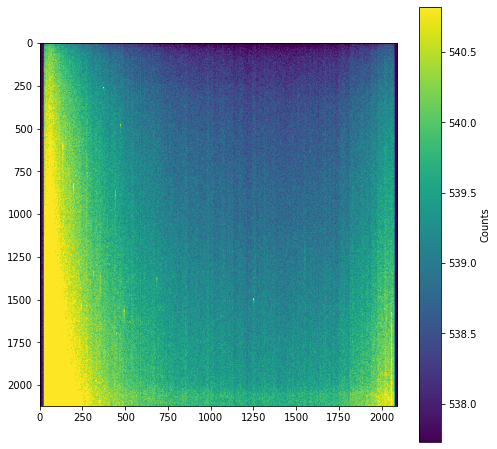

In [34]:
plt.figure('superBias', figsize=(8, 8))
plt.imshow(superBias, vmin=statsSB['mean']-0.05*statsSB['std'], vmax=statsSB['mean']+0.05*statsSB['std'])
plt.colorbar(label='Counts')
plt.show()

In general, the bias are usully taken each night to calibrate the images.
We can see that there is a uniformity in the center of the image but there are some dots.
These dots are caused by cosmic ray due to the fact that the CCD are sensitive.

## Calculate flat  H_alpha and  R

The CCD detectors are non-uniformly illuminated and can retain pixel-to-pixel variations. 
Flat-field frames are necessary to correct these effects. These flat-fields allow us to correct any pattern of the detector and filters 

The flat-field can be obtained by observing a screen on the inside of the dome of the telescope, which is illuminated by lights. 
We can obtain the flat-field with this metod because it has the advantage that dome flat-fields are easy to obtain a good SNR image during the day. However, the direction of light entry in the telescope may be different from that during the night so it is a problem.

The best method to obtain the flat-field is observing the sky during morning and evening twilight because in this time the sky has the better approximates uniform illumination.

Typically, a series of 10 to 15 flat-fields frames are carried out.
We can use the normalized median of the flat-fields or the sigma-clipping process whose purpose is to eliminate pixels above the mean. In our case, we will use the normalized median.

Firstly, we make a list with all the flats of  H_alpha and the flats of R.

In [35]:
flatHaConcat = [fits.open(flatName)[0].data for flatName in FlatHADEF]
flatrSConcat = [fits.open(flatName)[0].data for flatName in FlatrSDEF]
len(flatHaConcat), flatHaConcat

(9,
 [array([[2257, 2257, 2932, ...,  541,  539,  538],
         [ 542,  542,  537, ...,  538,  543,  536],
         [ 541,  539,  539, ...,  544,  539,  539],
         ...,
         [ 537,  539,  537, ...,  538,  539,  539],
         [ 540,  538,  538, ...,  536,  542,  533],
         [ 537,  538,  538, ...,  540,  538,  539]], dtype=uint16),
  array([[2244, 2234, 2313, ...,  534,  542,  538],
         [ 537,  535,  536, ...,  535,  540,  538],
         [ 542,  538,  538, ...,  537,  542,  538],
         ...,
         [ 540,  539,  532, ...,  536,  538,  536],
         [ 534,  537,  535, ...,  540,  539,  538],
         [ 539,  540,  537, ...,  540,  540,  541]], dtype=uint16),
  array([[2264, 2246, 2336, ...,  539,  536,  538],
         [ 536,  535,  538, ...,  539,  535,  536],
         [ 537,  542,  534, ...,  538,  538,  537],
         ...,
         [ 541,  540,  535, ...,  536,  537,  537],
         [ 538,  540,  538, ...,  538,  537,  538],
         [ 538,  538,  537, ...,  534,

The next step, we will subtract the superBias from each flat and then divide it by the median of that same flat.
Therefore, we get some new edited lists.

In [36]:
flatHaedit=[] 
flatrSedit=[]

for flat in flatrSConcat:
    flatrSedit =([flat - superBias])/(np.nanmedian(flat)) #Flat in R filter normalized 
    
for flat in flatHaConcat:
    flatHaedit =([flat - superBias])/(np.nanmedian(flat)) #Flat in H_alpha filter normalized 

Now we can get the median of each pixels of all arrays and obtain the superflat of the H_alpha and R filter. 

In [37]:
superFlatHa = np.median(flatHaedit, axis=0)
superFlatrS = np.median(flatrSedit, axis=0)

We get the statistical parameters of superFlat H and superFlat R in a central zone of the image.

In [38]:
statsFlatH=imstats(superFlatHa[500:-500, 500:-500])
statsFlatR=imstats(superFlatrS[500:-500, 500:-500])

#### Plot superFlat H

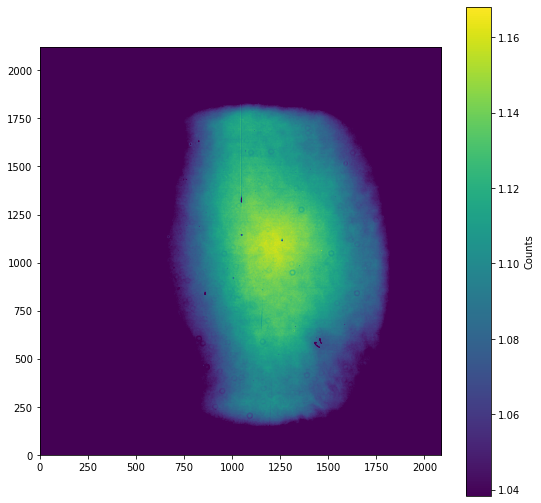

In [39]:
plt.figure('superFlatHa', figsize=(9, 9))
plt.imshow(superFlatHa, vmin=statsFlatH['median']-1*statsFlatH['std'], vmax=statsFlatH['median']+1*statsFlatH['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

#### Plot superFlat  R

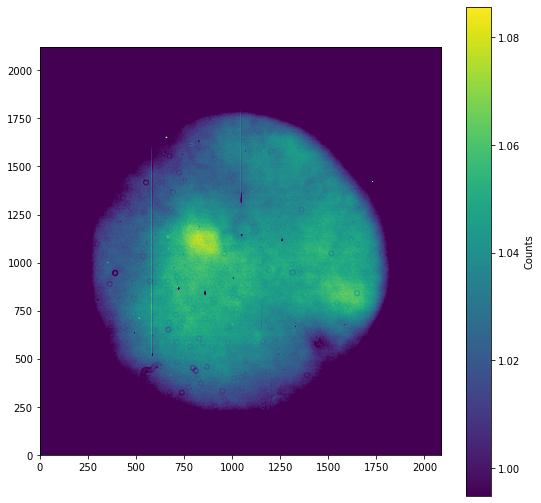

In [40]:
plt.figure('superFlatR', figsize=(9, 9))
plt.imshow(superFlatrS, vmin=statsFlatR['median']-1*statsFlatR['std'], vmax=statsFlatR['median']+1*statsFlatR['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

We can subtract the superBias from each image.

In [41]:
galaxyH_cb = []

for image in cigHa:
    hdul = fits.open(image)
    im =hdul[0].data
    im_b = im - superBias
    galaxyH_cb.append(im_b)

In [42]:
galaxyR_cb = []

for image in cigr:
    hdul = fits.open(image)
    im =hdul[0].data
    im_b = im - superBias
    galaxyR_cb.append(im_b)

Now let's divide it by the superFlats of H and superFlat of R.

In [43]:
galaxyH_cbfH = [image/superFlatHa for image in galaxyH_cb]

/Users/macintoshhd/Desktop/envAstro/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/macintoshhd/Desktop/envAstro/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [44]:
galaxyR_cbfR = [image/superFlatrS for image in galaxyR_cb]

/Users/macintoshhd/Desktop/envAstro/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/macintoshhd/Desktop/envAstro/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


We make the statistics of only the central zone in the new image (e.g the first image of R and H_alpha).

In [46]:
stats_cbfH0 = imstats(galaxyH_cbfH[0][300:-300, 300:-300])
stats_cbfR0 = imstats(galaxyR_cbfR[0][300:-300, 300:-300])

### Plot the first image of H_alpha (subtracted the superBias and divided by the superFlatH))

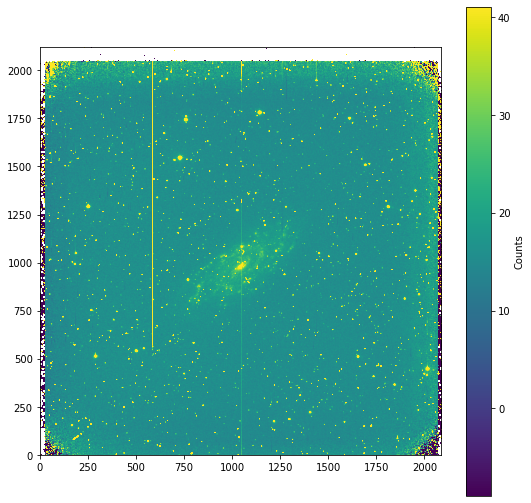

In [47]:
plt.figure('ImagenH0_bias/flat', figsize=(9, 9))
plt.imshow(galaxyH_cbfH[0], vmin=stats_cbfH0['median']-0.5*stats_cbfH0['std'], vmax=stats_cbfH0['median']+0.5*stats_cbfH0['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

### Plot the first image of R(subtracted the superBias and divided by the superFlatR))

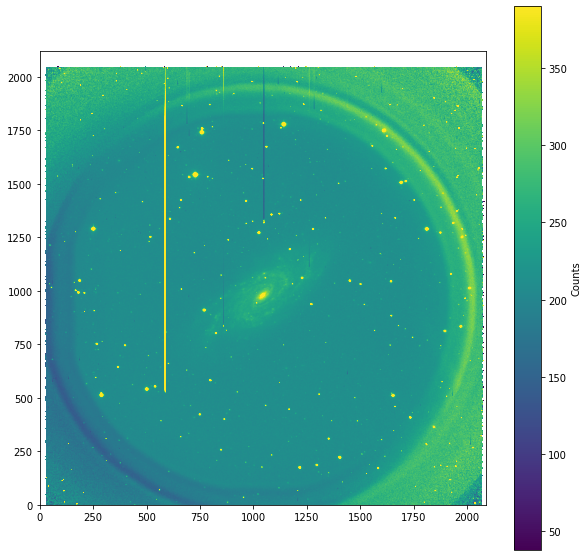

In [48]:
plt.figure('ImagenR0_bias/flat', figsize=(10,10))
plt.imshow(galaxyR_cbfR[0], vmin=stats_cbfR0['median']-0.5*stats_cbfR0['std'], vmax=stats_cbfR0['median']+0.5*stats_cbfR0['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

For each image, we need to substract the value of the background due to the fact that the counts of the regions without stars must be zero.

Firstly, we make a function to calculate de background of an image.

In [49]:
def mskRH(image):
    """"Return statistical parameters of the input image
    
    Parameters
    ---------
    fileName: array
        the array to be studied
        
    Returns
    -------
    result: float
        median   
    """
    maskara = make_source_mask(image, nsigma=2, npixels=5, dilate_size=11)
    meanCRH, medianCRH, stdCRH = sigma_clipped_stats(image, sigma=3.0, mask=maskara)
    return(medianCRH)

With the previous function we can remove the background for all the images of R and H_alpha filter.

In [50]:
galaxyR_cbfRm = []
galaxyH_cbfHm = []

for image in galaxyR_cbfR:
    im = image - mskRH(image) #We subtract the background to each image treated in filter R
    galaxyR_cbfRm.append(im)
    
for image in galaxyH_cbfH:
    im = image - mskRH(image)#We subtract the background to each image treated in filter H_alpha
    galaxyH_cbfHm.append(im) 

In [51]:
stats_cbfHm0 = imstats(galaxyH_cbfHm[0][300:-300, 300:-300])
stats_cbfRm0 = imstats(galaxyR_cbfRm[0][300:-300, 300:-300])

#### Plot the first image of R (subtract the superBias, divide by superFlat and subtract the background)

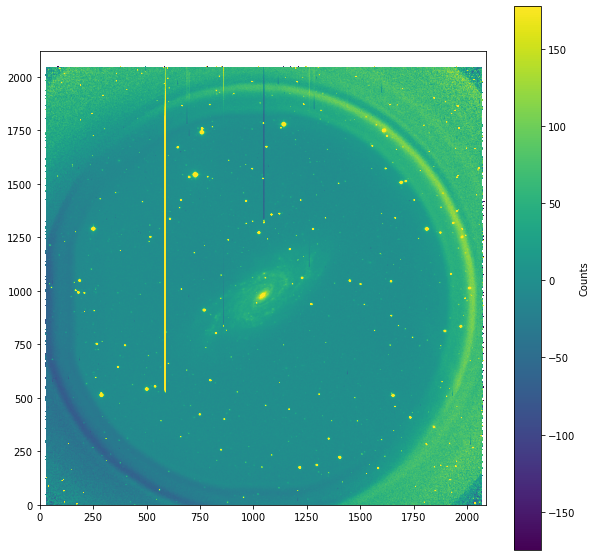

In [52]:
plt.figure('ImagenR0_bias/flat_m', figsize=(10,10))
plt.imshow(galaxyR_cbfRm[0], vmin=stats_cbfRm0['median']-0.5*stats_cbfRm0['std'], vmax=stats_cbfRm0['median']+0.5*stats_cbfRm0['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

#### Plot the first image of H_alpha (subtract the superBias, divide by superFlat and subtract the background)

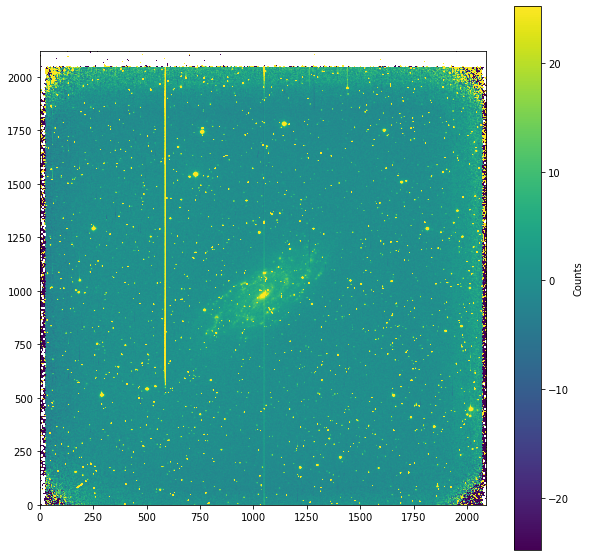

In [53]:
plt.figure('ImagenH0_bias/flat_m', figsize=(10,10))
plt.imshow(galaxyH_cbfHm[0], vmin=stats_cbfHm0['median']-0.5*stats_cbfHm0['std'], vmax=stats_cbfHm0['median']+0.5*stats_cbfHm0['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

## Divide by time exposure

With the background removed, we have to divided each image by the time exposure. 
We have to do this because we must consider that each image was taken for a lot of seconds.

In [54]:
timeR = []
timeH = []

for image in cigr:
    hdul = fits.open(image)
    time =hdul[0].header["EXPTIME"]
    timeR.append(time)
    
for image in cigHa:
    hdul = fits.open(image)
    time =hdul[0].header["EXPTIME"]
    timeH.append(time) 

In [56]:
# We convert lists times to arrays
timeR = np.array(timeR)
timeH = np.array(timeH)

Each galaxy image is divided by its exposure time.

In [57]:
galaxyR_cbfRmt = []
galaxyH_cbfHmt = []

for image in range(0,len(galaxyR_cbfRm)):
    imt = (galaxyR_cbfRm[image])/timeR[image]
    galaxyR_cbfRmt.append(imt)
    
for image in range(0,len(galaxyH_cbfHm)):
    imt = (galaxyH_cbfHm[image])/timeH[image]
    galaxyH_cbfHmt.append(imt) 

In [58]:
stats_cbfHmt0 = imstats(galaxyH_cbfHmt[0][300:-300, 300:-300])
stats_cbfRmt0 = imstats(galaxyR_cbfRmt[0][300:-300, 300:-300])

#### Plot the first image of R divided by time

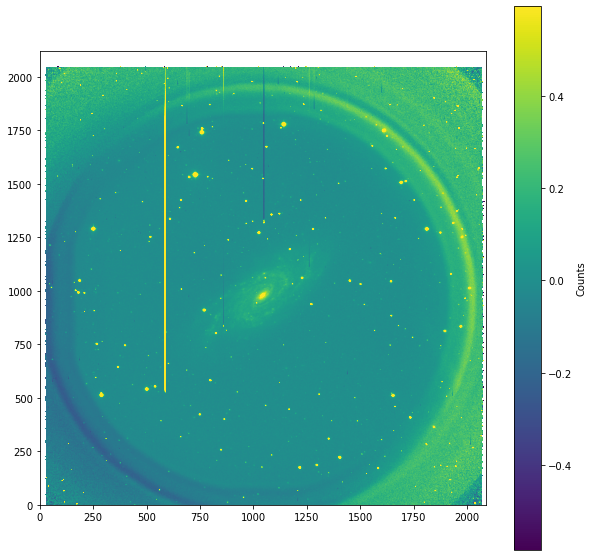

In [59]:
plt.figure('ImagenR0_bias/flat_m/t', figsize=(10,10))
plt.imshow(galaxyR_cbfRmt[0], vmin=stats_cbfRmt0['median']-0.5*stats_cbfRmt0['std'], vmax=stats_cbfRmt0['median']+0.5*stats_cbfRmt0['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

#### Plot the first image of H_alpha divided by time

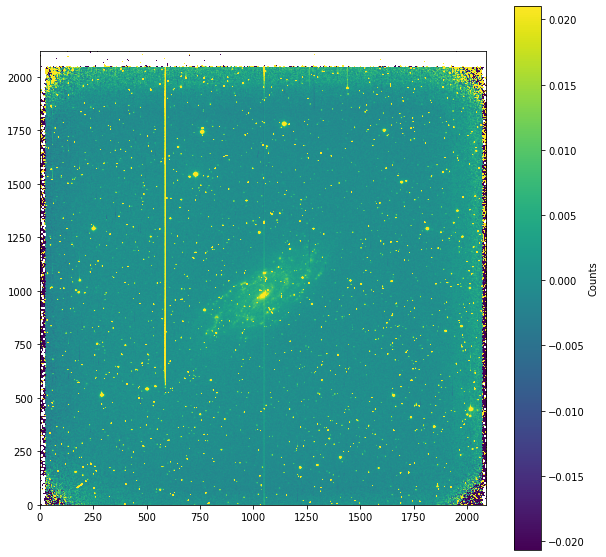

In [151]:
plt.figure('ImagenH0_bias/flat_m/t', figsize=(10,10))
plt.imshow(galaxyH_cbfHmt[0], vmin=stats_cbfHmt0['median']-0.5*stats_cbfHmt0['std'], vmax=stats_cbfHmt0['median']+0.5*stats_cbfHmt0['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

We are not ready yet to do photometry because each image has some bad pixels.
These pixels may be a problem if we would like to do photometry due to the fact that a bad pixel alter the statistical parameters.
The solution is making an algorithm to remove the bad pixels. We can do it in our case because we have the coordinates of the line with bad pixels.

## Removing bad pixels

The first step is downloading the file  with the coordinates of the bad pixels.
This file has the coordinates (x1,y1) of the first pixel in this line and the coordinates (x2,y2) of the last pixel in this line.

In [60]:
x1, x2, y1, y2 = np.loadtxt('badpix.lis', unpack=True).astype(np.int16)

We can make a function to remove the bad pixels for each image.

In [64]:
galaxyH_cbfHmtwbp = galaxyH_cbfHmt 
galaxyR_cbfRmtwbp = galaxyR_cbfRmt 

In [65]:
def fixpix(image):
    """"Return array fixed withut bad pixels
    
    Parameters
    ---------
    fileName: array
        the array to be studied
        
    Returns
    -------
    result: float
        array   
    """
    
    arrayfix = image
    
    for coordx1, coordx2, coordy1, coordy2 in zip(x1, x2, y1, y2):
        badlinesy = range(coordy1-1, coordy2)
        for numbery in badlinesy:
            if coordx1 == coordx2:
                arrayfix[numbery, coordx1-1] = np.median([arrayfix[numbery, coordx1-2],arrayfix[numbery, coordx1]])
            else:
                badlinesx = range(coordx1-1, coordx2)
                for numberx in badlinesx:
                    arrayfix[numbery, numberx] = np.median([arrayfix[numbery, coordx1-2],arrayfix[numbery, coordx2]])
    return arrayfix

In [68]:
stats_cbfHmtwbp0 = imstats(galaxyH_cbfHmtwbp[0][300:-300, 300:-300])
stats_cbfRmtwbp0 = imstats(galaxyR_cbfRmtwbp[0][300:-300, 300:-300])

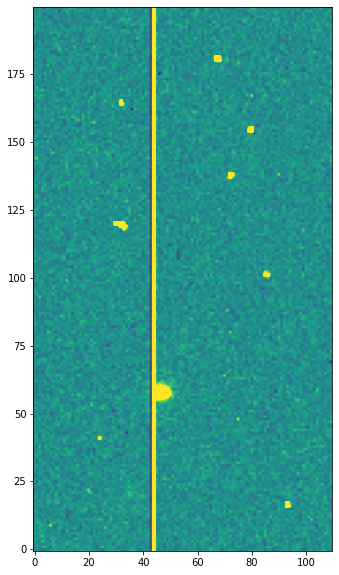

In [69]:
plt.figure('Bad line pixel', figsize=(10,10))
plt.imshow(galaxyH_cbfHmtwbp[0][750:950, 540:650], vmin=stats_cbfHmtwbp0['median']-0.5*stats_cbfHmtwbp0['std'], vmax=stats_cbfHmtwbp0['median']+0.5*stats_cbfHmtwbp0['std'],origin ='lower')
plt.show()

In [70]:
galaxyH_cbfHmtbp = [fixpix(imagen) for imagen in galaxyH_cbfHmt]
galaxyR_cbfRmtbp = [fixpix(imagen) for imagen in galaxyR_cbfRmt]

In [81]:
stats_cbfHmtbp0 = imstats(galaxyH_cbfHmtbp[0][300:-300, 300:-300])
stats_cbfRmtbp0 = imstats(galaxyR_cbfRmtbp[0][300:-300, 300:-300])

#### Plot the firt image of H_alpha with bad pixels

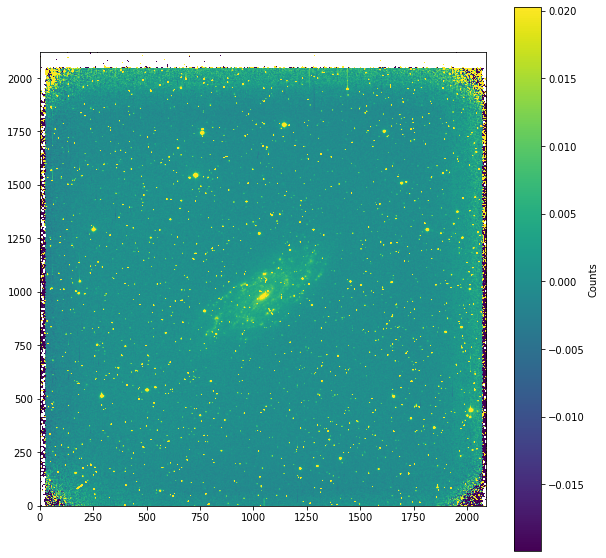

In [82]:
plt.figure('ImageH0_bias/flat_m/tbp', figsize=(10,10))
plt.imshow(galaxyH_cbfHmtbp[0], vmin=stats_cbfHmtbp0['median']-0.5*stats_cbfHmtbp0['std'], vmax=stats_cbfHmtbp0['median']+0.5*stats_cbfHmtbp0['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

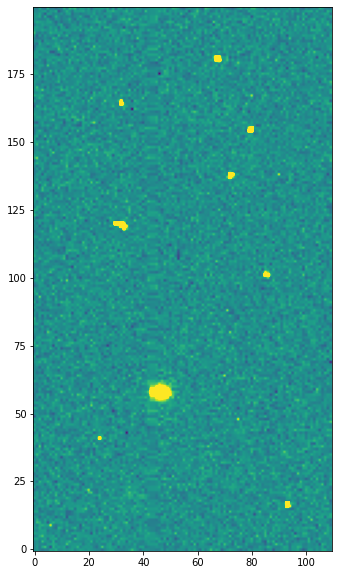

In [83]:
plt.figure('Bad pixel line fixed', figsize=(10,10))
plt.imshow(galaxyH_cbfHmtbp[0][750:950, 540:650], vmin=stats_cbfHmtbp0['median']-0.5*stats_cbfHmtbp0['std'], vmax=stats_cbfHmtbp0['median']+0.5*stats_cbfHmtbp0['std'],origin ='lower')
plt.show()

As you can see, that bad pixel line has been fixed with our function. In addition, this functions works to fix all the bad pixel lines in our images.

We can use this method to fix the bad pixels in the images in R filter.

#### Plot the firt image of R with bad pixels

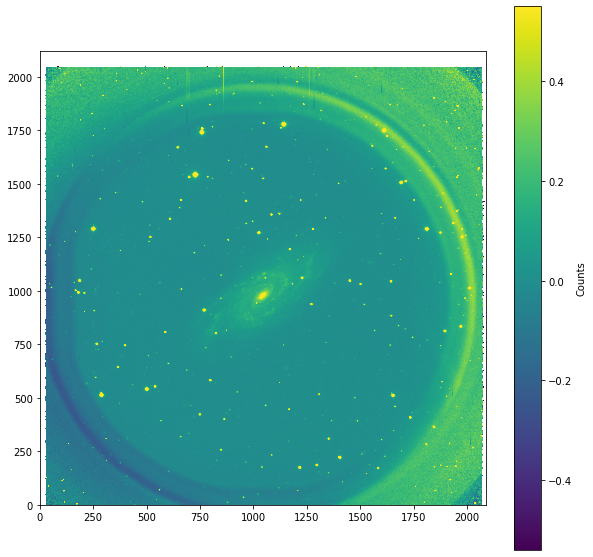

In [86]:
plt.figure('ImageR0_bias/flat_m/tbp', figsize=(10,10))
plt.imshow(galaxyR_cbfRmtbp[0], vmin=stats_cbfRmtbp0['median']-0.5*stats_cbfRmtbp0['std'], vmax=stats_cbfRmtbp0['median']+0.5*stats_cbfRmtbp0['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

However, there are a few lines on the top of the images but we don´t have to feel worried because they are faint.

# Star detection

We need to have a single image of the galaxy. However the images aren´t aligned so we have to do that task.
Therefore we will detect the stars in the first image in the H_alpha filter using photometry.
Once we detect the stars, we get their coordinates so we can use them like a reference frame. This is useful because we need only to shift the other images according to these coordinates.

We start with the H_alpha filter because if we detect a star, the same star will appear in the R filter. However, if we started with the R filter, we couldn´t find the same number of stars.

## Star detection in the first image in H_alpha filter

First of all, we have to mask the region of the galaxy. This region must be masked because this region has a lot of regularities that make it difficult to find stars.

In [87]:
meanHo, medianHo, stdHo = sigma_clipped_stats(galaxyH_cbfHmtbp[0][500:-500, 500:-500], sigma=3.0)# Galaxy statistical
daofindHo = DAOStarFinder(fwhm=8.0, threshold= 10. * stdHo)# The conditions of those stars(fwhm = 8 and threshold = 6*std)
maskHo = np.zeros(galaxyH_cbfHmtbp[0][500:-500, 500:-500].shape, dtype=bool)
maskHo[200:850, 200:850] = True
sourcesHo = daofindHo(galaxyH_cbfHmtbp[0][500:-500, 500:-500], mask=maskHo)
for col in sourcesHo.colnames:
     sourcesHo[col].info.format = '%.8g'  # for consistent table output
#print(sourcesHo)
len(sourcesHo)

18

We could find 18 stars. The number of star finded depends on FWHM and the standard desviation.

We try to detect star in this image and use it as reference star

#### Plot the first image in H_alpha filter with the stars detected

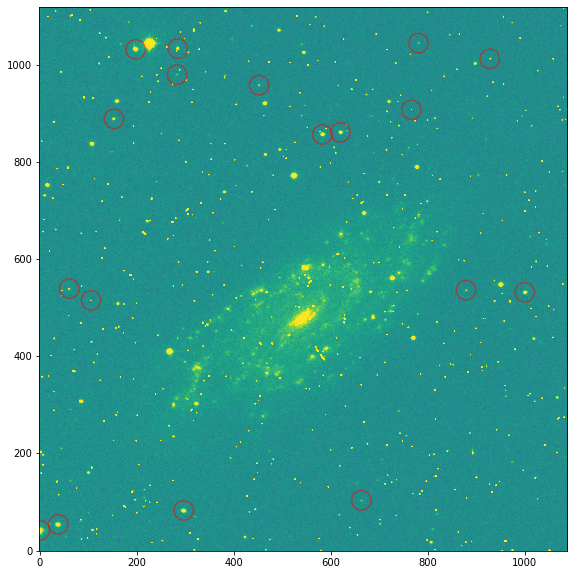

In [88]:
positions_stars = np.transpose((sourcesHo['xcentroid'], sourcesHo['ycentroid']))
apertures_stars = CircularAperture(positions_stars, r=20.)

plt.figure('Image_galaxyH', figsize=(10,10))
plt.imshow(galaxyH_cbfHmtbp[0][500:-500, 500:-500],vmin=stats_cbfHmtbp0['median']-0.5*stats_cbfHmtbp0['std'], vmax=stats_cbfHmtbp0['median']+0.5*stats_cbfHmtbp0['std'], origin='lower')
apertures_stars.plot(color='red', lw=1.5, alpha=0.5);

We create an array with the coordinates of the red circles. These circles have the detected star in the center so we can use them as reference point in the other images.

In [89]:
pxo = np.array([sourcesHo['xcentroid']])
pyo = np.array([sourcesHo['ycentroid']])

We shift all the images with respect to the coordinates of the first image in H_alpha

In [90]:
galaxyH_cbfHmtbps = []

for image in galaxyH_cbfHmtbp:
    
    pxch, pych = centroid_sources(image[500:-500, 500:-500], sourcesHo['xcentroid'], sourcesHo['ycentroid'], 
                                box_size=11, centroid_func=centroid_com)#box size = 15
    difhx = np.median(pxch - pxo)
    difhy = np.median(pych - pyo)
    
    galaxyH_cbfHmtbps.append(ndimage.shift(image,[difhy,difhx], output=None, order=1, mode='constant', 
                                           cval=0.0, prefilter=True))
    
    print(difhx,difhy)

0.0004679275095185176 0.018007807564313083
0.7479316398485807 0.02741258038334138
1.1913551293311855 0.07491898260957441
1.7151779949300092 0.17532911141741536


In [91]:
galaxyR_cbfRmtbps = []

for image in galaxyR_cbfRmtbp:
    
    pxcr, pycr = centroid_sources(image[500:-500, 500:-500], sourcesHo['xcentroid'], sourcesHo['ycentroid'], 
                                box_size=15, centroid_func=centroid_com)
    difrx = np.median(pxcr - pxo)
    difry = np.median(pycr - pyo)
    
    galaxyR_cbfRmtbps.append(ndimage.shift(image,[difry,difrx], output=None, order=1, mode='constant', cval=0.0, prefilter=True))
    
    print(difrx,difry)

-1.9034327015777066 -1.2886972133386507
-1.835650154949974 -1.4377216655282155
-1.1273853997180652 -1.4617669291264974
-1.1195459590316261 -1.4035767939250832


# Single image of R and H

With the shifted images, we can concatenate them and we obtain a single image for each filter.

In [92]:
superGalaxyH = np.median(galaxyH_cbfHmtbps, axis=0)
superGalaxyR = np.median(galaxyR_cbfRmtbps, axis=0)

/Users/macintoshhd/Desktop/envAstro/lib/python3.7/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [93]:
stats_superGalaxyR = imstats(superGalaxyR[500:-500, 500:-500])
stats_superGalaxyH = imstats(superGalaxyH[500:-500, 500:-500])

#### Plot galaxy in R filter

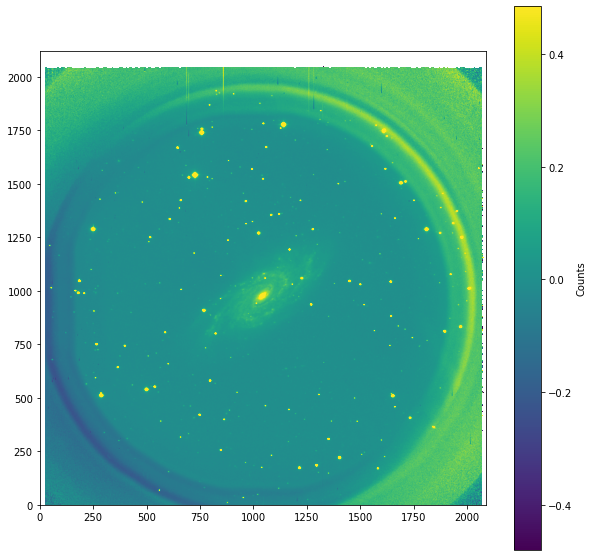

In [94]:
plt.figure('Image_galaxyR', figsize=(10,10))
plt.imshow(superGalaxyR, vmin=stats_superGalaxyR['median']-0.5*stats_superGalaxyR['std'], vmax=stats_superGalaxyR['median']+0.5*stats_superGalaxyR['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()  

#### Plot galaxy in H_alpha filter 

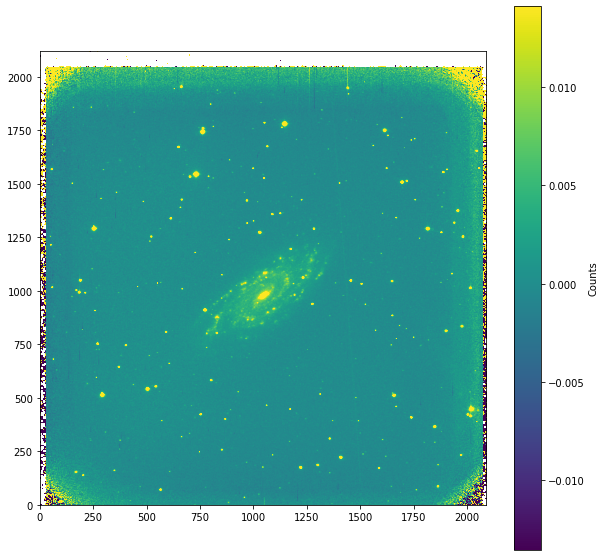

In [95]:
plt.figure('Image_galaxyH', figsize=(10,10))
plt.imshow(superGalaxyH, vmin=stats_superGalaxyH['median']-0.5*stats_superGalaxyH['std'], vmax=stats_superGalaxyH['median']+0.5*stats_superGalaxyH['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show() 

Now we can do photometry and measure the flux of the stars in each filter.
We star with the H_alpha filter finding stars and getting their coordinates.

In [96]:
meanH, medianH, stdH = sigma_clipped_stats(superGalaxyH[500:-500, 500:-500], sigma=3.0)#Estadistica de la galaxia
daofindH = DAOStarFinder(fwhm=4.0, threshold=12. * stdH)#Las condiciones de esas estrellas(fwhm = 4 y umbral = 12*std)
maskH = np.zeros(superGalaxyH[500:-500, 500:-500].shape, dtype=bool)
maskH[200:850, 200:850] = True
sourcesH = daofindH(superGalaxyH[500:-500, 500:-500], mask=maskH)
for col in sourcesH.colnames:
     sourcesH[col].info.format = '%.8g'  # for consistent table output
#print(sourcesH)
len(sourcesH)

28

We found 28 stars in this filter so we will use the same coordinates to calculate the flux in theses stars in the R filter.

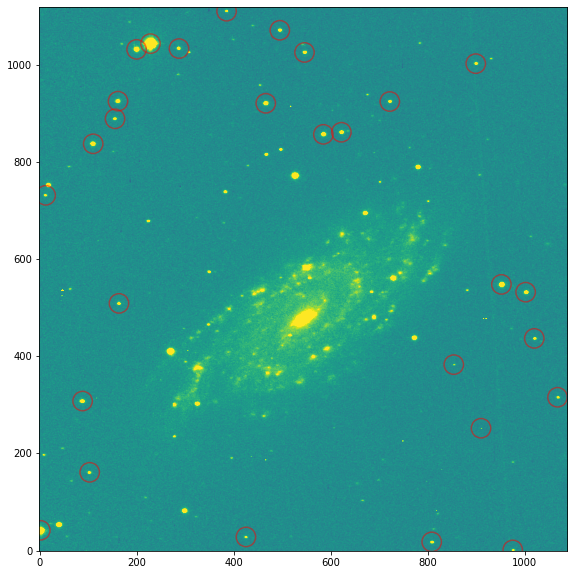

In [97]:
positions_starsH = np.transpose((sourcesH['xcentroid'], sourcesH['ycentroid']))
apertures_starsH = CircularAperture(positions_starsH, r=20.)

plt.figure('Image_galaxyH', figsize=(10,10))
plt.imshow(superGalaxyH[500:-500, 500:-500],vmin=stats_superGalaxyH['median']-0.5*stats_superGalaxyH['std'], vmax=stats_superGalaxyH['median']+0.5*stats_superGalaxyH['std'], origin='lower')
apertures_starsH.plot(color='red', lw=1.5, alpha=0.5);

We generate a table with the x and y coordinates of the stars detected in H_alpha and the flux of the stars in the single image in H_alpha and R filter.

In [98]:
phot_tableH = aperture_photometry(superGalaxyH[500:-500, 500:-500], apertures_starsH)
phot_tableH['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_tableH)

 id      xcenter            ycenter       aperture_sum
           pix                pix                     
--- ------------------ ------------------ ------------
  1   974.867034289658  1.337557068435206   0.43231704
  2  807.9573275175118 17.894870589937998    1.0771863
  3  425.2234772026694  28.07333789360515   0.76831487
  4 1.6295296470700114  41.76549390238682    34.522654
  5 103.26132258687858 161.18054002640227    1.5397002
  6  909.5357980210797 252.06114389196063 -0.045600811
...                ...                ...          ...
 22  898.7366638326966 1003.2445378354151    1.0695124
 23   545.841738701072 1026.2932039127263    1.8717398
 24  199.9335083474242 1032.6162328556823    10.137142
 25 287.29070049564456 1034.2988079238992    1.6256247
 26  228.4735215450568 1044.4433743330742    205.87616
 27  494.9963315055152 1071.9753229244166    1.4494689
 28  385.3125723331088 1111.2345078950705   0.40823222
Length = 28 rows


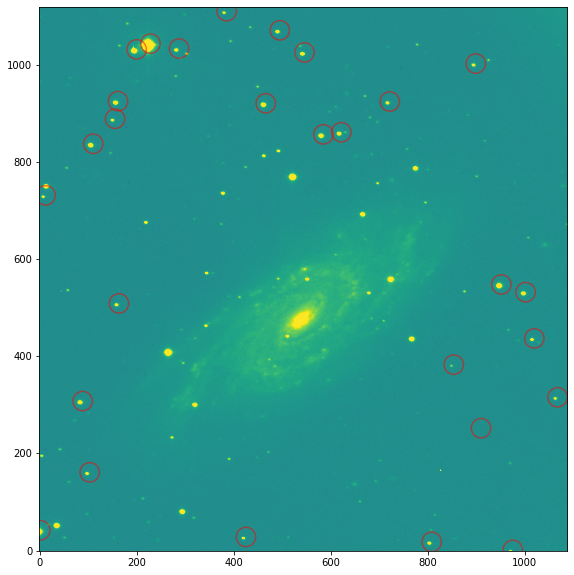

In [99]:
plt.figure('Image_galaxyR', figsize=(10,10))
plt.imshow(superGalaxyR[500:-500, 500:-500],vmin=stats_superGalaxyR['median']-0.5*stats_superGalaxyR['std'], vmax=stats_superGalaxyR['median']+0.5*stats_superGalaxyR['std'], origin='lower')
apertures_starsH.plot(color='red', lw=1.5, alpha=0.5);

Table with the x and y coordinates of the opening circles and their fluxes in the image of R

In [100]:
phot_tableR = aperture_photometry(superGalaxyR[500:-500, 500:-500], apertures_starsH)
phot_tableR['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_tableR)

 id      xcenter            ycenter       aperture_sum
           pix                pix                     
--- ------------------ ------------------ ------------
  1   974.867034289658  1.337557068435206    9.6695092
  2  807.9573275175118 17.894870589937998    48.512914
  3  425.2234772026694  28.07333789360515      19.1691
  4 1.6295296470700114  41.76549390238682    234.43914
  5 103.26132258687858 161.18054002640227      31.5225
  6  909.5357980210797 252.06114389196063  -0.88342691
...                ...                ...          ...
 22  898.7366638326966 1003.2445378354151    41.558246
 23   545.841738701072 1026.2932039127263    89.558425
 24  199.9335083474242 1032.6162328556823    552.53357
 25 287.29070049564456 1034.2988079238992    71.468518
 26  228.4735215450568 1044.4433743330742     8262.172
 27  494.9963315055152 1071.9753229244166    61.197288
 28  385.3125723331088 1111.2345078950705     18.48534
Length = 28 rows


With this information, let´s plot the flux on stars in R filter VS  flux on star in H_alpha filter.
Our purpuse is to obtain the linear dependence (slope) and use it to concatenate both images. 

#### Plot flux on stars in filter R vs flux on star in filter H

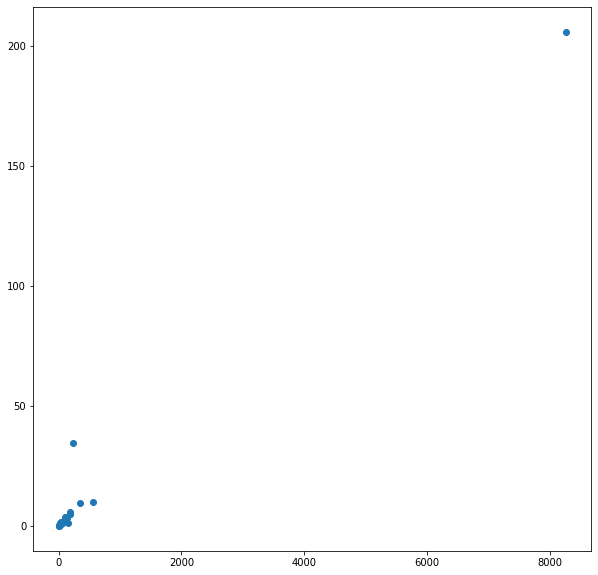

In [101]:
plt.figure('RvsHa', figsize=(10,10))
plt.plot(phot_tableR['aperture_sum'], phot_tableH['aperture_sum'], 'o')
#plt.xlim(0, 800)
#plt.ylim(0, 25)

Now, we try to fit the data to a 1º grade polynomial equation

In [102]:
polinom = np.polyfit(phot_tableR['aperture_sum'],phot_tableH['aperture_sum'],1)
polinom

array([0.02482277, 1.04311734])

In [103]:
pH = phot_tableH['aperture_sum']
pR = phot_tableR['aperture_sum']
#pHR = np.array([pH,pH])
len(pR)

28

As you can see, in the plot there are points that are very far from the main distribution.
This problem is due to the circles in zones where there is a two stars together or it may be a galaxy in the background. Anyway, we can solve this problem with a mask focusing in the main points distribution.

In [104]:
pHDeff = pH[pH<25]

In [105]:
pRDeff = pR[pH<25]

In [106]:
len(pRDeff)

26

Text(0, 0.5, 'Flux H_alpha')

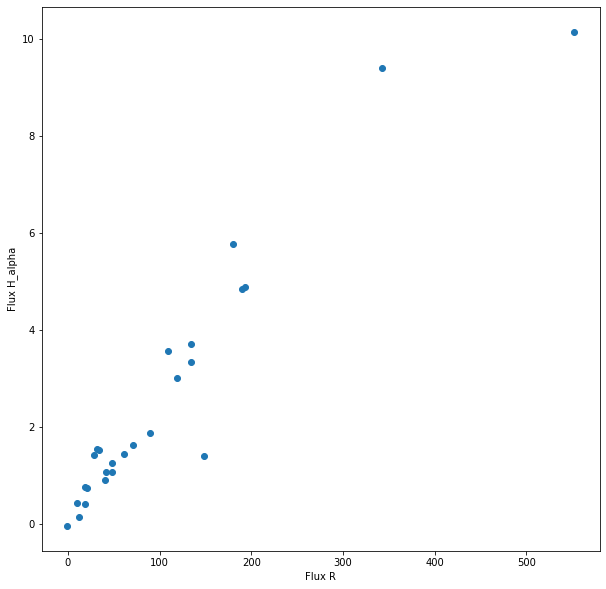

In [114]:
plt.figure('FiRvsHa_modified', figsize=(10,10))
plt.plot(pRDeff, pHDeff, 'o')
plt.xlabel('Flux R')
plt.ylabel('Flux H_alpha')

#plt.xlim(0, 800)
#plt.ylim(0, 25)

In [115]:
polinomDeff = np.polyfit(pRDeff,pHDeff,1)
polinomDeff

array([0.02061973, 0.42205457])

In [116]:
xpdeff = [np.min(pRDeff), np.max(pRDeff)]

#### Plot flux on stars in filter R vs flux on star in filter H ( with the main points distribution)

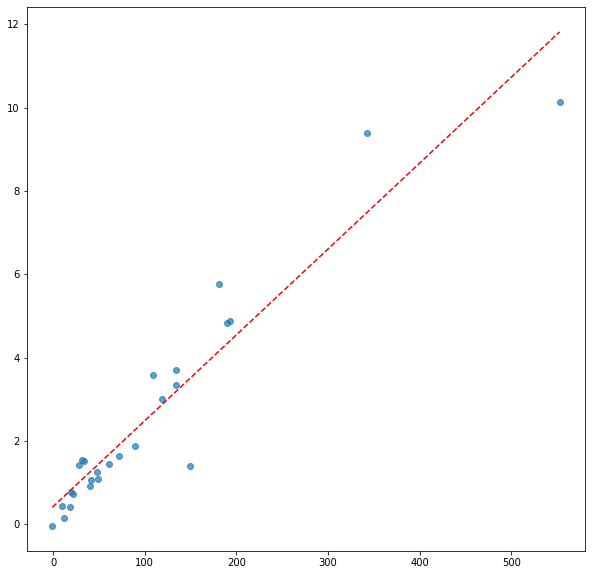

In [117]:
plt.figure('Curve_Fit_RvsHa', figsize=(10,10))
plt.plot(pRDeff,pHDeff, 'o', alpha=.7)
plt.plot(xpdeff, np.polyval(polinomDeff, xpdeff), 'r--')

We can observe that the data can be fitted very well to a a line.

## Single galaxy

In this section, now we can subtract galaxy in H_alpha minus galaxy in R filter * slope. The final result is a single galaxy.

In [119]:
TotalGalaxy = superGalaxyH -polinomDeff[0]*superGalaxyR

/Users/macintoshhd/Desktop/envAstro/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


In [120]:
stats_TotalGalaxy= imstats(TotalGalaxy[500:-500, 500:-500])

#### Plot the single galaxy 

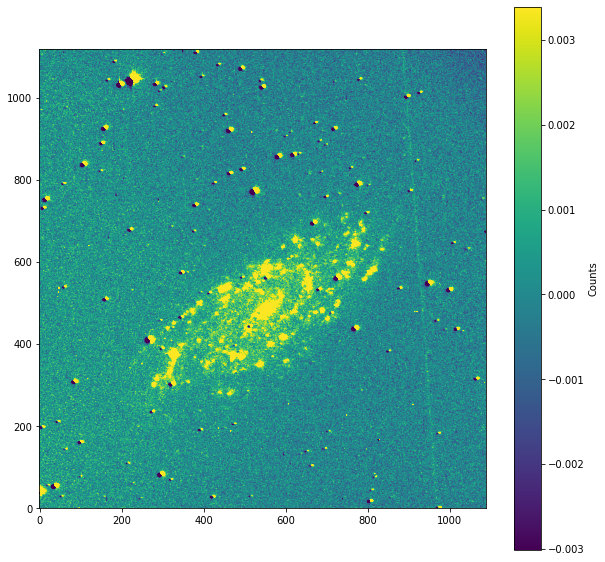

In [121]:
plt.figure('H_alpha - slope*R', figsize=(10,10))
plt.imshow(TotalGalaxy[500:-500, 500:-500], vmin=stats_TotalGalaxy['median']-0.1*stats_TotalGalaxy['std'], vmax=stats_TotalGalaxy['median']+0.1*stats_TotalGalaxy['std'],origin ='lower')
plt.colorbar(label='Counts')#0.1
plt.show()

The black dots are due to the small errors in alignment. However we can say that the galaxy is not bad. These mistakes  could be fixed with other fit or other algorithm to do the shifting.

If we want to see the galaxy like a disc, firstly we have to rotate it, with its z-axis points up.
Then we can stretch the galaxy on that axis until it takes the shape of a disk.

In other words, our galaxy is like an ellipse and our task is to rotate it and stretch it by its minor axis, so that we obtain a circle.

In [122]:
RotateGalaxy = ndimage.rotate(TotalGalaxy,35,order = 1)


We rotate the galaxy 35º more or less.

#### Plot the rotated galaxy 

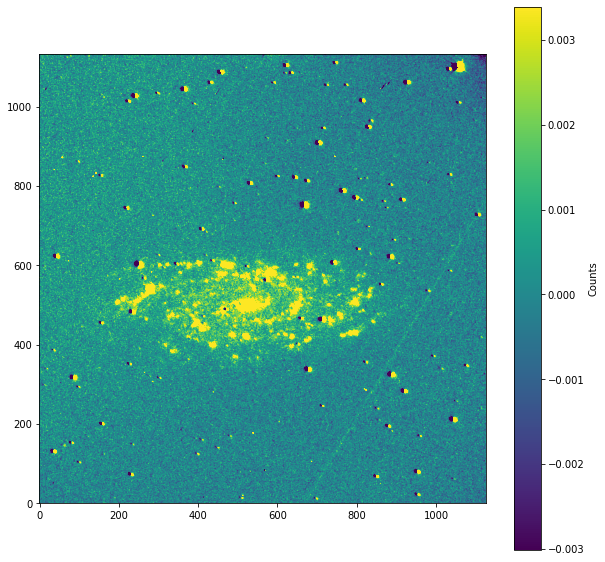

In [123]:
plt.figure('SuperGalaxyRotate', figsize=(10,10))
plt.imshow(RotateGalaxy[900:-900, 900:-900], vmin=stats_TotalGalaxy['median']-0.1*stats_TotalGalaxy['std'], vmax=stats_TotalGalaxy['median']+0.1*stats_TotalGalaxy['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

We stretch the galaxy with the next code:

In [124]:
Galaxy = ndimage.zoom(RotateGalaxy[900:-900, 900:-900],(2.7,1), order = 1)

#### Plot stretched galaxy

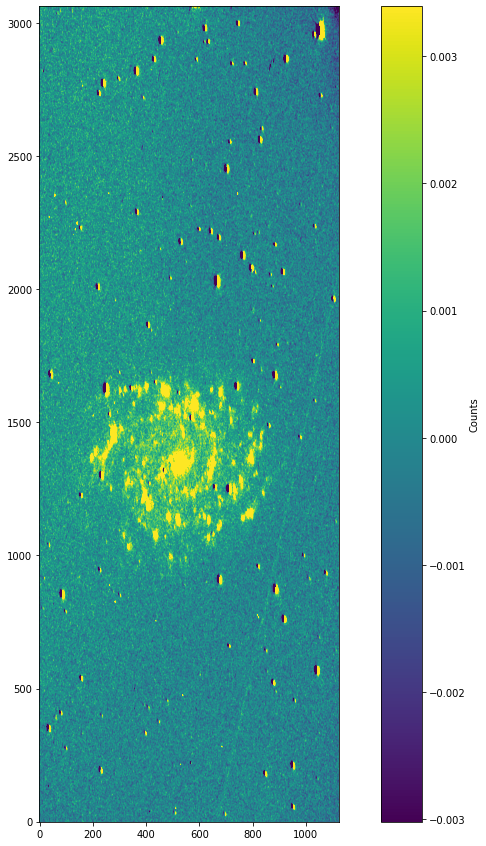

In [125]:
plt.figure('SuperGalaxyCircle', figsize=(15,15))
plt.imshow(Galaxy , vmin=stats_TotalGalaxy['median']-0.1*stats_TotalGalaxy['std'], vmax=stats_TotalGalaxy['median']+0.1*stats_TotalGalaxy['std'],origin ='lower')
plt.colorbar(label='Counts')
plt.show()

We are interested in the central zone so we focus only in the galaxy.

In [126]:
GalaxyCentre = Galaxy[850:-1250, 180:-180]

#### Plot galaxy centered

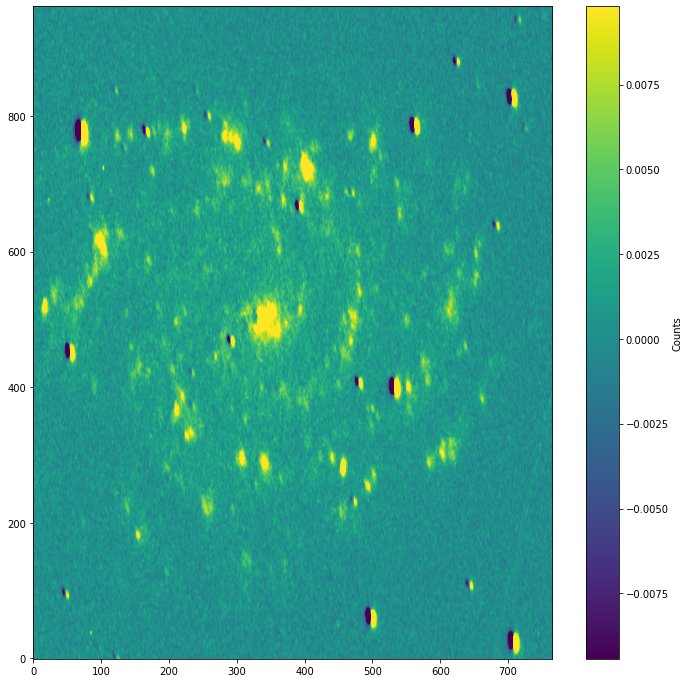

In [127]:
plt.figure('SuperGalaxyCircle', figsize=(12,12))
plt.imshow(GalaxyCentre, vmin=stats_TotalGalaxy['median']-0.3*stats_TotalGalaxy['std'], vmax=stats_TotalGalaxy['median']+0.3*stats_TotalGalaxy['std'],origin ='lower')
plt.colorbar(label='Counts')#0.1
plt.show()

With this image, we can do photometry to to find the flux in the H_II zones so let´s search stars in the final image of the galaxy and measure their fluxes.
In the same way that we did photometry in the first image in H_alpha filter, we can do that in this image too.

In [128]:
meanGalaxyC, medianGalaxyC, stdGalaxyC = sigma_clipped_stats(GalaxyCentre , sigma=3.0)
daofindGalaxyC = DAOStarFinder(fwhm=6.0, threshold=5. * stdGalaxyC)#6,5
sourcesGalaxyC = daofindGalaxyC(GalaxyCentre)
for col in sourcesGalaxyC.colnames:
     sourcesGalaxyC[col].info.format = '%.8g'  # for consistent table output
#print(sourcesGalaxyC)
len(sourcesGalaxyC)

41

We detected 31 sources with the conditions of FWHM = 6 and the standard desviation x 6

In [129]:
stats_GalaxyC = imstats(GalaxyCentre)

#### Plot galaxy image with the  detected sources of H_II

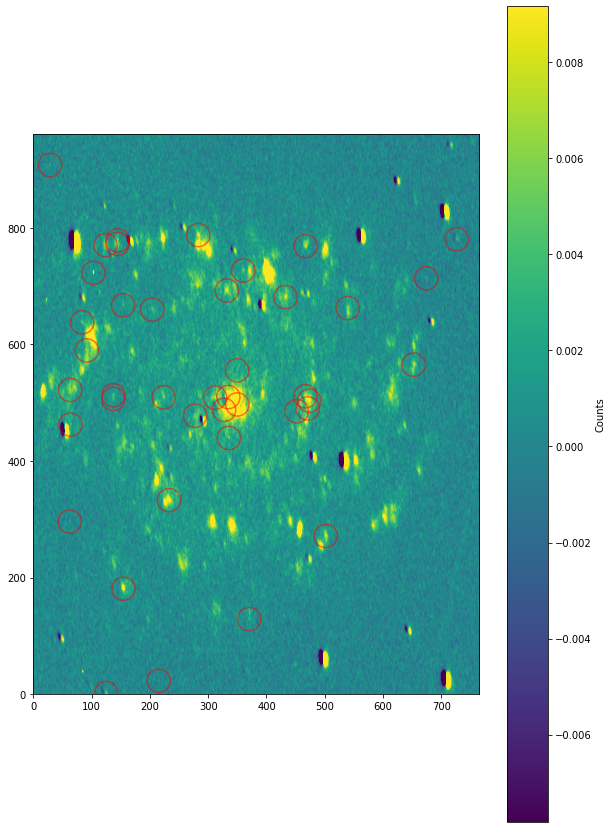

In [130]:
positions_starsGC = np.transpose((sourcesGalaxyC['xcentroid'], sourcesGalaxyC['ycentroid']))
apertures_starsGC = CircularAperture(positions_starsGC, r=20.)

plt.figure('SuperGalaxyCircle', figsize=(10,15))
plt.imshow(GalaxyCentre, vmin=stats_GalaxyC['median']-0.9*stats_GalaxyC['std'], vmax=stats_GalaxyC['median']+0.9*stats_GalaxyC['std'],origin ='lower')
plt.colorbar(label='Counts')#0.5
apertures_starsGC.plot(color='red', lw=1.5, alpha=0.5);

We get a table with the coordinates and the fluxes in this H_II region.

In [131]:
phot_tableGC = aperture_photometry(GalaxyCentre, apertures_starsGC)
phot_tableGC['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_tableGC)

 id      xcenter            ycenter       aperture_sum
           pix                pix                     
--- ------------------ ------------------ ------------
  1 125.15041308126997  1.769573344382097  0.078722121
  2 215.14398642027547    22.793011430052   0.17783814
  3 370.27395911475213  128.6840337786194    1.0804416
  4  154.7823386601729 180.82435958390943    2.6209092
  5  501.5407352080148 271.33017242179835     2.918824
  6  62.35861157192248   296.042277887032   0.45869198
...                ...                ...          ...
 35  466.9522191434958  768.6455718904248    1.7204823
 36 123.80118578320398  770.3571821731036    2.5419243
 37 143.87355430037414  772.6360849164041    2.0713117
 38 144.19076731885363  778.4013132124875    1.5380214
 39  726.6565015615179  780.3156679732904   0.18659609
 40  282.8793023468158  787.7019251379522     4.787678
 41 28.789980343235754  907.9622524918057   0.45214227
Length = 41 rows


The last step is the scatter plot of this region.

In [132]:
xcp = positions_starsGC [:, 0]
ycp = positions_starsGC [:, 1]
zcp = xcp * 0
area = sourcesGalaxyC['peak'] * 50000
colors = sourcesGalaxyC['flux'] * 50000

len(xcp), len(ycp), len(area), len(colors)

(41, 41, 41, 41)

#### Scatter plot in 2D

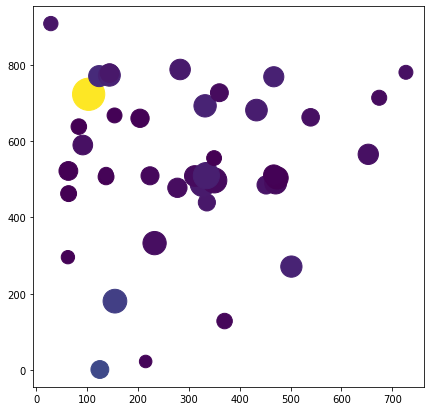

In [133]:
plt.figure('Scatter2ytdghtr', figsize=(7, 7))
plt.scatter(xcp, ycp, s=area, c=colors)
plt.xlabel

plt.show()

#### Scatter plot in 3D

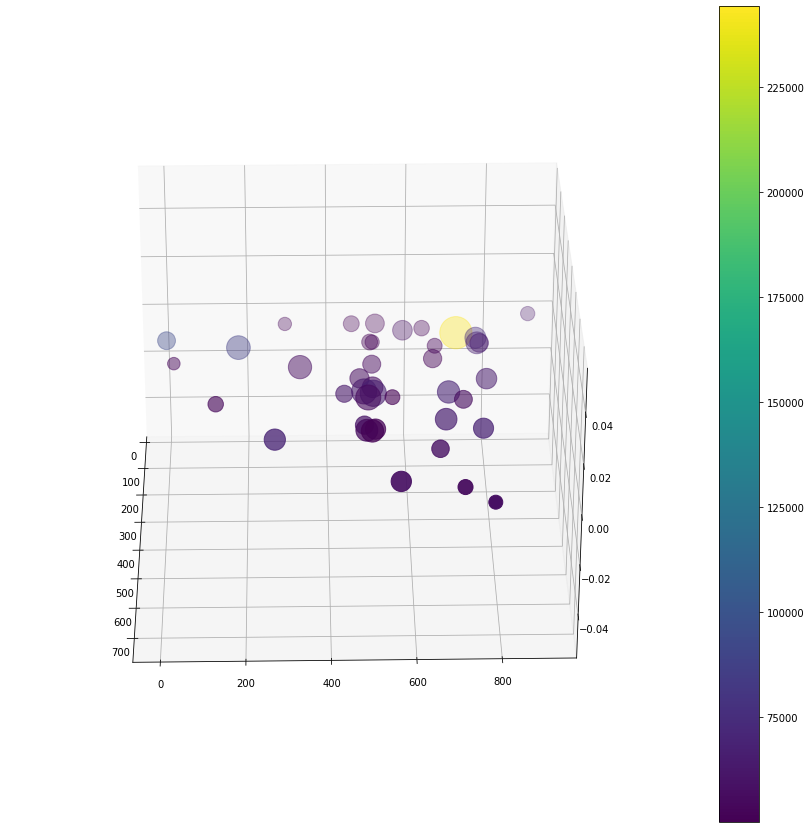

In [363]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 

plt.ion()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
z=np.zeros(len(xcp))
c=colors
p = ax.scatter(xcp, ycp, z, s=area, c=colors)
fig.colorbar(p)
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    #plt.pause(.001)